In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BootCamp/Datasets/cybersecurity_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
df['Severity'] = ''

for i, row in df.iterrows():
    loss = row['Financial Loss (in Million $)']
    if loss > 70:
        df.at[i, 'Severity'] = 'High'
    elif loss > 40:
        df.at[i, 'Severity'] = 'Medium'
    else:
        df.at[i, 'Severity'] = 'Low'
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Severity
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63,High
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71,Medium
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20,Low
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7,Medium
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68,High


In [ ]:
df['Country'].value_counts()

,count
Country,
UK,321
Brazil,310
India,308
Japan,305
France,305
Australia,297
Russia,295
Germany,291
USA,287


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1_ngYHAOIr-DDmFi22aTBQh7v6FkcYjL1ZErey3tyPkk/edit#gid=0


In [ ]:
user_choice = str(input("Enter the attack type: "))

def severity_per_attack_type(user_choice, df, ploting = False):
  severitys = df.loc[(df['Attack Type'] ==  user_choice ), 'Severity']
  severity_dict = dict(severitys.value_counts().reindex(["High", "Medium", "Low"], fill_value=0))
  if ploting != False:
    return severity_dict
  for key, value in severity_dict.items():
    print(f'The number of {key} severity {user_choice} attacks is: {value}')


severity_per_attack_type(user_choice,  df)

Enter the attack type: DDoS
The number of High severity DDoS attacks is: 180
The number of Medium severity DDoS attacks is: 149
The number of Low severity DDoS attacks is: 202


In [ ]:

import plotly.graph_objects as go

# To use in the plot function
severity_dict = severity_per_attack_type(user_choice,  df, True)
# Function to plot the severity distribution as a half-donut
def plot_severity_donut(seve_dict, df):
    # Plot
    labels = list(seve_dict.keys())
    values = list(seve_dict.values())
    colors = ['red', 'orange', 'green']

    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        hole=0.5,
        marker=dict(colors=colors),
        sort=False,
        direction='clockwise',
        textinfo='percent+label'
    )])

    fig.update_layout(
        title_text=f"Severity Distribution for {user_choice} Attacks",
        title_x=0.5,
        showlegend=False,
        margin=dict(t=50, b=0, l=0, r=0),
        height=400,
        annotations=[dict(text=user_choice, x=0.5, y=0.5, font_size=20, showarrow=False)]
    )
    fig.update_layout(
        piecolorway=colors,
        height=360
    )

    fig.show()

user_choice = str(input("Enter the attack type: "))
plot_severity_donut(severity_dict, df)


Enter the attack type: DDoS


In [ ]:
user_choice = str(input("Enter the attack source: "))
def attack_type_per_attack_source(user_choice,df):
  types = df.loc[(df['Attack Source'] ==  user_choice ), 'Attack Type']
  types_list = list(dict(types.value_counts()).items())
  value = 0
  idx = ''
  for i in types_list:
      if i[1] > value:
        value = i[1]
        idx = i[0]

  print(f'The most commen attack done by {user_choice} source is: {idx}')
attack_type_per_attack_source(user_choice,df)

Enter the attack source: Hacker Group
The most commen attack done by Hacker Group source is: Phishing


In [ ]:
types = df.loc[(df['Attack Source'] ==  'Nation-state' ), 'Attack Type']
types.value_counts()


,count
Attack Type,
Phishing,141
SQL Injection,138
DDoS,137
Man-in-the-Middle,131
Malware,124
Ransomware,123


In [ ]:
df['Target Industry'].value_counts()

,count
Target Industry,
IT,478
Banking,445
Healthcare,429
Retail,423
Education,419
Government,403
Telecommunications,403


In [ ]:
def lost_per_industry(df, ploting = False):
  industrys = list(df['Target Industry'].unique())
  lost_industry = {}
  for industry in industrys:
    lost_industry[industry] = df.loc[df['Target Industry'] == industry, 'Financial Loss (in Million $)'].sum()
  industrys_list = list(lost_industry.keys())
  lost_list = list(lost_industry.values())
  if ploting !=False:
    return industrys_list, lost_list
  for key, value in lost_industry.items():
    print(f"The total loss suffered by the {key} is: ${value:,.0f} Million")
lost_per_industry(df)

The total loss suffered by the Education is: $20,071 Million
The total loss suffered by the Retail is: $21,120 Million
The total loss suffered by the IT is: $24,810 Million
The total loss suffered by the Telecommunications is: $20,459 Million
The total loss suffered by the Government is: $21,205 Million
The total loss suffered by the Banking is: $22,772 Million
The total loss suffered by the Healthcare is: $21,041 Million


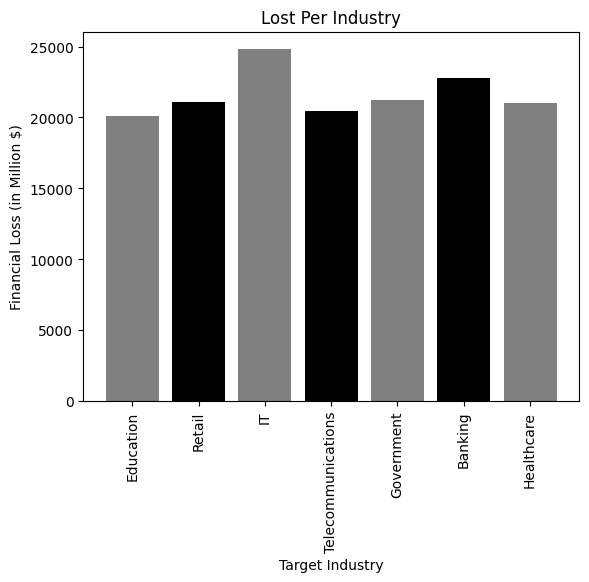

In [ ]:
import matplotlib.pyplot as plt

industrys_list, lost_list = lost_per_industry(df, True)
fig, ax = plt.subplots()

colors = ['gray', 'black']

ax.bar(industrys_list, lost_list, color = colors)

ax.set_xlabel('Target Industry')
ax.set_ylabel('Financial Loss (in Million $)')
plt.xticks(rotation=90)
ax.set_title('Lost Per Industry')
plt.show()